# Novel Time Series Primitive that Allows Real World Classification - Contrast Profile

In [2]:
import stumpy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('https://raw.githubusercontent.com/TDAmeritrade/stumpy/main/docs/stumpy.mplstyle')



## Introduction

The tutorial is adapted from the [Matrix Profile XXIII paper](https://www.cs.ucr.edu/~eamonn/ContrastProfile_V048_names.pdf).  

Subsequence’s distance to its nearest neighbor within the same 
dataset can be represented by the [Matrix Profile](https://stumpy.readthedocs.io/en/latest/Tutorial_The_Matrix_Profile.html).  

By naively using `stmpy.stump`, you can discover **motifs** and **discords**.  
Time series **motifs** refer to two particularly **close** subsequences,  
whereas time series **discords** indicate subsequences that are **far** from their nearest neighbors.  

So, let's consider the case of finding a specific similar subsequences (in gray) from data like the one shown in the figure below.

In [3]:
df = pd.read_csv("ECG_demo.csv", index_col=0).astype(float)
T = df.values[:, 1]
m = 128  # window size as an example
idx_sp0, idx_sp1 = 1280, 2400 # similar subsequences indices

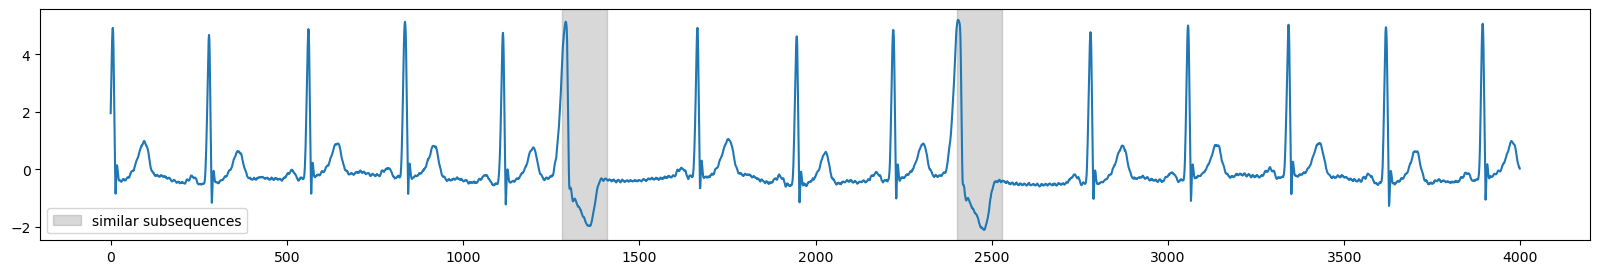

In [4]:
plt.figure(figsize=(20, 3))
plt.plot(T)
plt.axvspan(idx_sp0, idx_sp0+m, color="grey", alpha=0.3, label="similar subsequences")
plt.axvspan(idx_sp1, idx_sp1+m, color="grey", alpha=0.3)
plt.legend()
plt.show()

Finding those similar subsequences as top-discord is difficult because these two are similar.
However these two above might be finded as top-motif thanks to its apparent similarity.  
Let's calculate the top10-motif using `stumpy.stump` and `stumpy.motifs`.

As a point of caution: [ When calculate `stumpy.stump`, those subsequences we want to find have clear characteristics in their size(scale),  
so we calculate with `normalize=False`, which is True as the default in `stumpy.stump`. ]

In [5]:
mp = stumpy.stump(T, m, normalize=False)  # calculate matrix profiel
motifs = stumpy.motifs(T, mp[:, 0])  # find top10-motifs

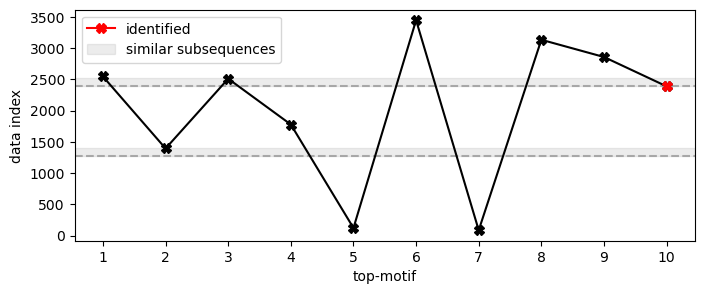

In [7]:
id_motif = np.arange(1, 11)  # index for plot

plt.figure(figsize=(8, 3))
plt.plot(id_motif, motifs[1][0], color="k", marker="X", ms=7)
plt.plot(id_motif[9], motifs[1][0][9], color="r", marker="X", ms=7, label="identified")
plt.axhline(idx_sp0, color="k", alpha=0.3, linestyle="--", zorder=-1)
plt.axhline(idx_sp1, color="k", alpha=0.3, linestyle="--", zorder=-1)
plt.axhspan(idx_sp0, idx_sp0+m, color="grey", alpha=0.15, label="similar subsequences")
plt.axhspan(idx_sp1, idx_sp1+m, color="grey", alpha=0.15)
plt.xticks(id_motif)
plt.xlabel("top-motif")
plt.ylabel("data index")
plt.legend()
plt.show()

We can find those as **top 10th motifs** in this data.  
Let's try displaying those on the actual data.

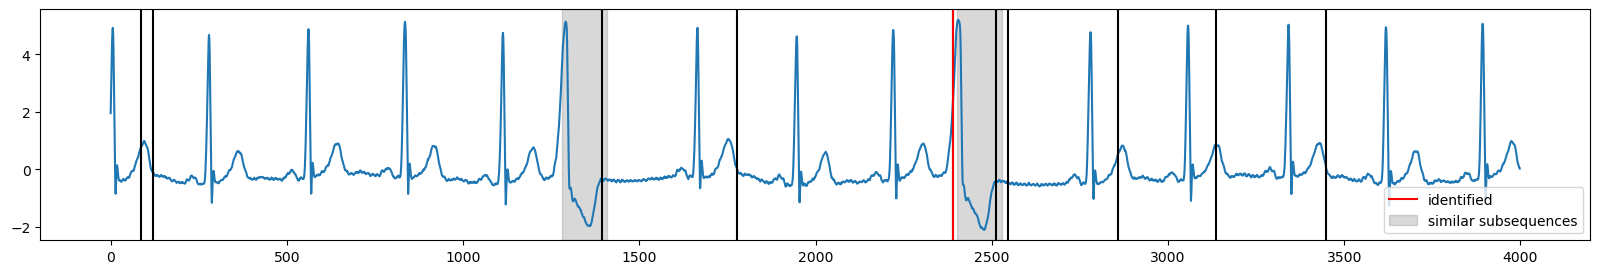

In [8]:
plt.figure(figsize=(20, 3))
plt.plot(T)
for i in motifs[1][0]:
    plt.axvline(i, color="k")
plt.axvline(motifs[1][0][9], color="r", label="identified")
plt.axvspan(idx_sp0, idx_sp0+m, color="grey", alpha=0.3, label="similar subsequences")
plt.axvspan(idx_sp1, idx_sp1+m, color="grey", alpha=0.3)
plt.legend()
plt.show()

Although we found those as the 10th this time, the order in which it's found can vary depending on the data.  
This is thought to be caused by the following situations.  
1. There are many favorable candidates for the top-motifs because parts of the subsequences other than those we want to find also have repetitive characteristics.  
2. Those subsequences we want to find repeat only once, so the order of the top-motif depends on other parts of the data.  

This characteristic like repeating only once can be used in the **Contrast Profile** we're going to introduce, which allows us to effectively find those.



-----